## Klasifikasi Fashion MNIST Menggunakan Deep Learning

## Menggunakan CNN (Convolutional Neural Network)

Import modul dan load dataset.

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('fashion\data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting fashion\data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting fashion\data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting fashion\data\t10k-images-idx3-ubyte.gz
Extracting fashion\data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
mnist.train.images.shape


(55000, 784)

In [3]:
import matplotlib.pyplot as plt

sample_1 = mnist.train.images[4000].reshape(28,28)
plt.imshow(sample_1, cmap='Greys')

Load input dan output. Reshape input untuk dimasukkan ke model.

In [4]:
import numpy as np
X_train = np.reshape(mnist.train.images, [-1,28,28,1])
y_train = mnist.train.labels
X_validation = np.reshape(mnist.validation.images, [-1,28,28,1])
y_validation = mnist.validation.labels
X_test = np.reshape(mnist.test.images, [-1,28,28,1])
y_test = mnist.test.labels

In [5]:
print('X train = ', X_train.shape)
print('y train = ',y_train.shape)
print('X validation = ',X_validation.shape)
print('X validation = ',y_validation.shape)
print('X test = ',X_test.shape)
print('y test = ',y_test.shape)

X train =  (55000, 28, 28, 1)
y train =  (55000, 10)
X validation =  (5000, 28, 28, 1)
X validation =  (5000, 10)
X test =  (10000, 28, 28, 1)
y test =  (10000, 10)


In [6]:
X_test[4000].shape

(28, 28, 1)

Membuat model keras sequential. Setelah inisialiasasi, dimasukan layer-layer model secara berurutan.

In [7]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)  

Menentukan loss function, optimizer dan metric yang akan digunakan.

In [8]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Train model.

In [9]:
history=model.fit(X_train,y_train,batch_size=64,validation_data=(X_validation, y_validation),epochs=10)

Train on 55000 samples, validate on 5000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
55000/55000 [==============================] - 7s 135us/sample - loss: 0.5980 - acc: 0.7801 - val_loss: 0.3713 - val_acc: 0.8694
Epoch 2/10
55000/55000 [==============================] - 6s 118us/sample - loss: 0.4165 - acc: 0.8505 - val_loss: 0.3251 - val_acc: 0.8854
Epoch 3/10
55000/55000 [==============================] - 6s 102us/sample - loss: 0.3712 - acc: 0.8639 - val_loss: 0.2980 - val_acc: 0.8914
Epoch 4/10
55000/55000 [==============================] - 6s 101us/sample - loss: 0.3448 - acc: 0.8725 - val_loss: 0.2769 - val_acc: 0.8984
Epoch 5/10
55000/55000 [==============================] - 6s 102us/sample - loss: 0.3220 - acc: 0.8828 - val_loss: 0.2667 - val_acc: 0.9014
Epoch 6/10
55000/55000 [==============================] - 6s 102us/sample - loss: 0.3090 - acc: 0.8857 - val_loss: 0.2614 - val_acc: 0.9030
Epoch 7/10
55000/55000 [==============================] - 6s 10

Cek hasil nilai-nilai akurasi dan loss selama training

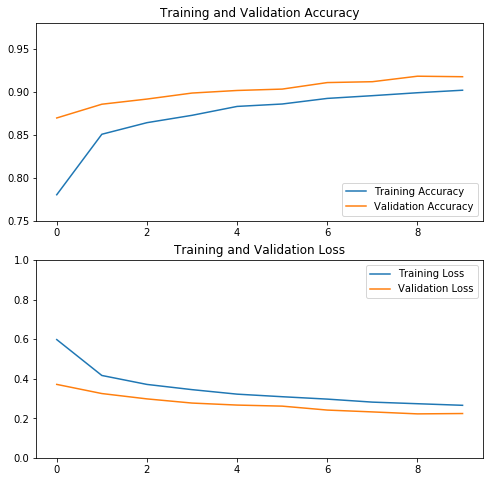

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.75, 0.98])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Mengecek akurasi:

In [11]:
score, acc = model.evaluate(X_test, y_test,
                            batch_size=64)

10000/10000 [==============================] - 0s 36us/sample - loss: 0.2446 - acc: 0.9100


In [12]:
print('Score :%f, Accuracy : %f'%(score,acc))

Score :0.244619, Accuracy : 0.910000


Hasil akurasi test akhir adalah 90%

In [13]:
y_pred = model.predict(X_test)

In [14]:
y_pred[0]

array([1.18357974e-07, 1.49400776e-07, 2.69975864e-08, 5.87737787e-08,
       8.35454483e-10, 1.77218026e-04, 4.26410267e-08, 2.25262018e-03,
       1.34528733e-07, 9.97569621e-01], dtype=float32)

In [15]:
from sklearn.utils.multiclass import unique_labels
label_names = unique_labels(['Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'])

Meggunakan fungsi plot confusion matrix dari dokumentasi sklearn

In [16]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Menunjukkan Confusion Matrix

Confusion matrix, without normalization
[[870   0  25  29   5   1  67   0   3   0]
 [  0 981   1  11   2   0   3   0   2   0]
 [ 17   1 902  10  35   0  35   0   0   0]
 [ 15  11   7 920  23   0  22   0   2   0]
 [  1   0  95  28 820   0  56   0   0   0]
 [  0   0   0   0   0 986   0  11   0   3]
 [114   2  81  29  69   0 699   0   6   0]
 [  0   0   0   0   0   5   0 981   0  14]
 [  2   2   0   3   4   1   2   2 984   0]
 [  0   0   0   0   0   4   1  38   0 957]]
Normalized confusion matrix
[[0.87  0.    0.025 0.029 0.005 0.001 0.067 0.    0.003 0.   ]
 [0.    0.981 0.001 0.011 0.002 0.    0.003 0.    0.002 0.   ]
 [0.017 0.001 0.902 0.01  0.035 0.    0.035 0.    0.    0.   ]
 [0.015 0.011 0.007 0.92  0.023 0.    0.022 0.    0.002 0.   ]
 [0.001 0.    0.095 0.028 0.82  0.    0.056 0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.986 0.    0.011 0.    0.003]
 [0.114 0.002 0.081 0.029 0.069 0.    0.699 0.    0.006 0.   ]
 [0.    0.    0.    0.    0.    0.005 0.    0.981 0.    0.01

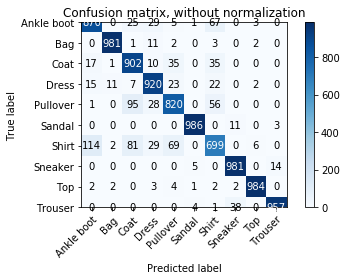

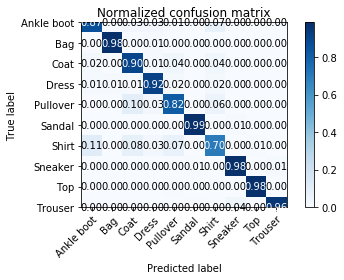

In [17]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), classes=label_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), classes=label_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## Menggunakan Transfer Learning

### Dengan Model ResNet50

Import modul yang akan digunakan untuk transfer learning

In [18]:
import tensorflow as tf
import keras
#Library OpenCV untuk Resizing
import cv2
import scipy
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
fashion_mnist = input_data.read_data_sets('fashion\data', one_hot=True)

Using TensorFlow backend.


Extracting fashion\data\train-images-idx3-ubyte.gz
Extracting fashion\data\train-labels-idx1-ubyte.gz
Extracting fashion\data\t10k-images-idx3-ubyte.gz
Extracting fashion\data\t10k-labels-idx1-ubyte.gz


In [19]:
X_train = np.reshape(fashion_mnist.train.images, [-1, 28, 28, 1])

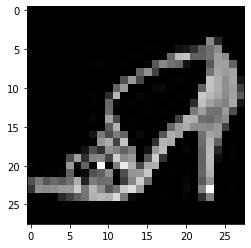

In [20]:
import matplotlib.pyplot as plt
plt.imshow(X_train[3000].reshape(28,28),cmap='gray')

Pada model yang digunakan diperlukan bentuk image dengan size minimal 32x32 dengan 3 channel. Buat method untuk meresize array gambar.

In [21]:
def resizeImageArray(source,image_size):
    resize = np.resize(source,[source.shape[0],image_size,image_size,1])
    for i in range(source.shape[0]):
        a = cv2.resize(source[i], dsize=(image_size, image_size), interpolation=cv2.INTER_LANCZOS4)
        b = np.resize(a,[image_size,image_size,1])
        resize[i] = b
    resize = np.repeat(resize,3,axis=3)
    return resize

Load data input dan output dataset. Agar dapat dimasukan ke model, resize input.

In [22]:
image_size = 32
X_train = resizeImageArray(X_train,image_size)
y_train = fashion_mnist.train.labels

In [23]:
X_validation = np.reshape(fashion_mnist.validation.images , [-1, 28, 28, 1])
X_validation = resizeImageArray(X_validation,image_size)
y_validation = fashion_mnist.validation.labels

In [24]:
X_test = np.reshape(fashion_mnist.test.images,[-1,28,28,1])
X_test = resizeImageArray(X_test, image_size)
y_test = fashion_mnist.test.labels

Cek data yang dihasilkan

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


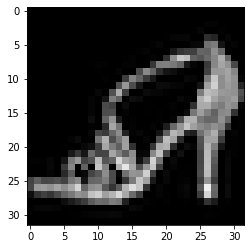

In [25]:
import matplotlib.pyplot as plt
plt.imshow(X_train[3000])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


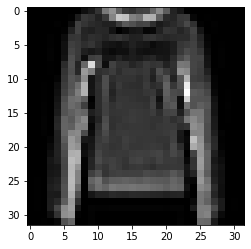

In [26]:
import matplotlib.pyplot as plt
plt.imshow(X_validation[400])

Buat Image Data Generator yang akan digunakan.

In [27]:
batch_size = 128

# Preprocess using ResNet50 preprocess
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input)
validation_datagen = keras.preprocessing.image.ImageDataGenerator(
     preprocessing_function=tf.keras.applications.resnet50.preprocess_input)
test_datagen = keras.preprocessing.image.ImageDataGenerator(
     preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow(
    x =  X_train ,  
    y =  y_train ,
    batch_size=batch_size)

validation_generator = validation_datagen.flow(
    x = X_validation , 
    y = y_validation , 
    batch_size=batch_size)

test_generator = test_datagen.flow(
    x = X_test , 
    y = y_test , 
    batch_size=batch_size)

Load model yang akan digunakan untuk transfer learning. Gunakan include_top=False untuk memotong/truncate layer paling atas model.Gunakan weights dari hasil training imagenet karena kita menginginkan pretrained model.

In [28]:
IMG_SHAPE = (image_size, image_size, 3)

# Create the base model from the pre-trained model ResNet50
base_model = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

C:\Users\Hikari\Anaconda3\envs\tf_gpu\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Freeze model agar tidak terupdate weightnya.

In [29]:
base_model.trainable = False

In [30]:
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, 16, 16, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

Tambahkan layer dibelakang model menyesuaikan dengan output yang diinginkan.

In [31]:
model = tf.keras.Sequential([
  base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

Menentukan loss function, optimizer dan metric yang akan digunakan. Menggunakan optimizer RMSprop.

In [32]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0006),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Train model.

In [33]:
epochs = 10
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n //batch_size
history = model.fit_generator(train_generator,
                              validation_data = validation_generator,
                              validation_steps = validation_steps,
                              steps_per_epoch = steps_per_epoch,
                              epochs=epochs,
                              workers=4,
                              )

Epoch 1/10
430/430 [==============================] - 21s 48ms/step - loss: 1.0000 - acc: 0.6829 - val_loss: 11.8939 - val_acc: 0.1160
Epoch 2/10
430/430 [==============================] - 19s 44ms/step - loss: 0.7360 - acc: 0.7466 - val_loss: 1.8235 - val_acc: 0.5172
Epoch 3/10
430/430 [==============================] - 19s 44ms/step - loss: 0.6745 - acc: 0.7639 - val_loss: 0.6065 - val_acc: 0.7880
Epoch 4/10
430/430 [==============================] - 20s 47ms/step - loss: 0.6365 - acc: 0.7767 - val_loss: 0.6192 - val_acc: 0.7932
Epoch 5/10
430/430 [==============================] - 22s 52ms/step - loss: 0.6171 - acc: 0.7827 - val_loss: 0.6154 - val_acc: 0.7914
Epoch 6/10
430/430 [==============================] - 24s 56ms/step - loss: 0.5936 - acc: 0.7895 - val_loss: 0.6103 - val_acc: 0.7944
Epoch 7/10
430/430 [==============================] - 25s 59ms/step - loss: 0.5761 - acc: 0.7981 - val_loss: 0.6253 - val_acc: 0.7948
Epoch 8/10
430/430 [==============================] - 28s 66m

Tampilkan graph training model

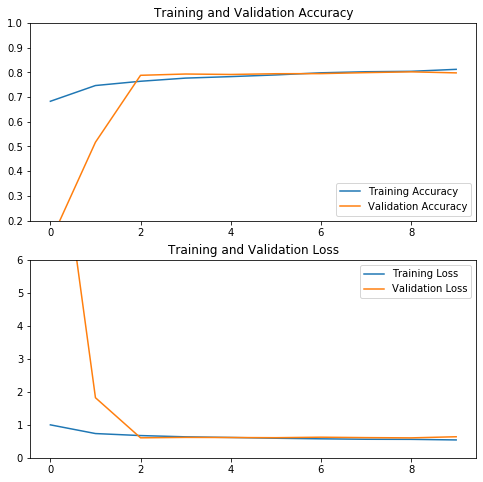

In [34]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 6])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [35]:
score, acc = model.evaluate_generator(generator=test_generator,steps=test_generator.n //batch_size)

In [36]:
print('Score :%f, Accuracy : %f'%(score,acc))

Score :0.690030, Accuracy : 0.779000


## Fine Tuning

Pada tahap fine-tuning, kita berusaha menaikan akurasi dengan mentraining ulang sebagian top layer dari Model yang kita gunakan. 

In [37]:
#Unfreeze weight model
base_model.trainable = True

print("Number of layers in the base model: ", len(base_model.layers))

fine_tune_at = 150
#Freeze weight layer yang tidak ingin ditrain yaitu semua layer sebelum layer 150
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  175


In [38]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=5e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Train kembali model.

In [39]:
history_fine = model.fit_generator(train_generator,
                                   steps_per_epoch = steps_per_epoch,
                                   epochs=epochs,
                                   workers=4,
                                   validation_data=validation_generator,
                                   validation_steps=validation_steps)

Epoch 1/10
430/430 [==============================] - 54s 126ms/step - loss: 0.4817 - acc: 0.8305 - val_loss: 0.5780 - val_acc: 0.8126
Epoch 2/10
430/430 [==============================] - 58s 135ms/step - loss: 0.4200 - acc: 0.8488 - val_loss: 0.5461 - val_acc: 0.8160
Epoch 3/10
430/430 [==============================] - 66s 153ms/step - loss: 0.3870 - acc: 0.8597 - val_loss: 0.5304 - val_acc: 0.8286
Epoch 4/10
430/430 [==============================] - 63s 146ms/step - loss: 0.3513 - acc: 0.8711 - val_loss: 0.5472 - val_acc: 0.8272
Epoch 5/10
430/430 [==============================] - 67s 156ms/step - loss: 0.3261 - acc: 0.8824 - val_loss: 0.5500 - val_acc: 0.8288
Epoch 6/10
430/430 [==============================] - 64s 148ms/step - loss: 0.3085 - acc: 0.8868 - val_loss: 0.5632 - val_acc: 0.8310
Epoch 7/10
430/430 [==============================] - 68s 157ms/step - loss: 0.2905 - acc: 0.8921 - val_loss: 0.5729 - val_acc: 0.8276
Epoch 8/10
430/430 [==============================] - 6

Tampilkan graph training fine tune model dan dibandingkan dengan training sebelumnya.

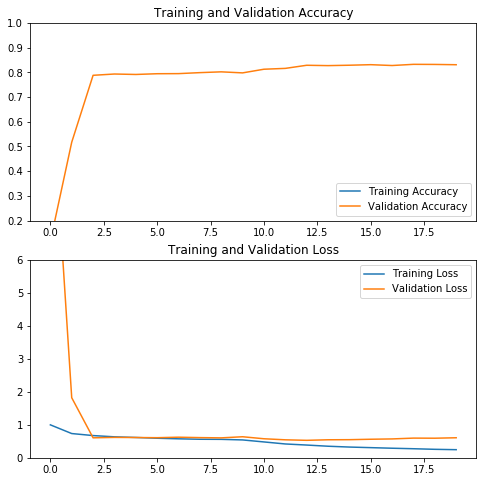

In [40]:
acc += history_fine.history['acc']
val_acc += history_fine.history['val_acc']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 6])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Tampilkan confusion matrix

Confusion matrix, without normalization
[[870   0  25  29   5   1  67   0   3   0]
 [  0 981   1  11   2   0   3   0   2   0]
 [ 17   1 902  10  35   0  35   0   0   0]
 [ 15  11   7 920  23   0  22   0   2   0]
 [  1   0  95  28 820   0  56   0   0   0]
 [  0   0   0   0   0 986   0  11   0   3]
 [114   2  81  29  69   0 699   0   6   0]
 [  0   0   0   0   0   5   0 981   0  14]
 [  2   2   0   3   4   1   2   2 984   0]
 [  0   0   0   0   0   4   1  38   0 957]]


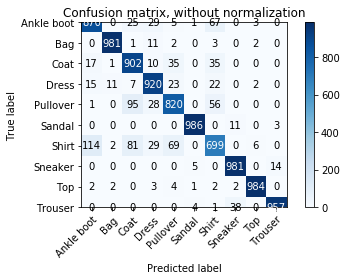

In [41]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), classes=label_names,
                      title='Confusion matrix, without normalization')

plt.show()

In [42]:
score, acc = model.evaluate_generator(generator=test_generator,steps=test_generator.n //batch_size)

In [43]:
print('Score :%f, Accuracy : %f'%(score,acc))

Score :0.701031, Accuracy : 0.817800


Akurasi akhir yang didapatkan di atas 80% yang merupakan nilai yang dapat diterima. Butuh lebih banyak parameter tuning untuk menghasilkan akurasi yang lebih baik. Kemungkinan ResNet50 terlalu kompleks (layer terlalu banyak) sehingga terjadi overfitting.